In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

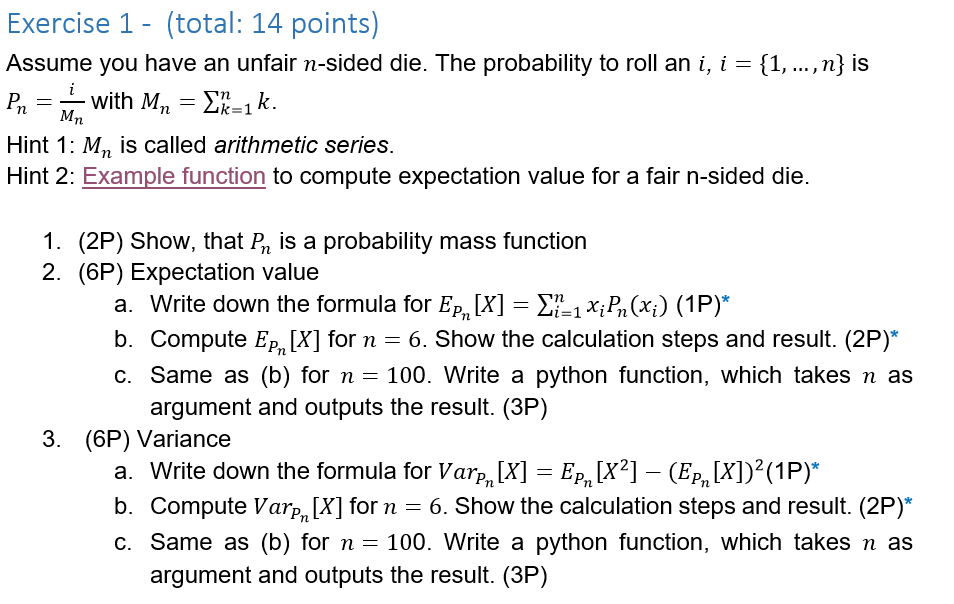

# 1

As shown on page 49 of the lecture slides, a probability mass function needs to satisfy two conditions:

* Condition 1: The probability of any dice roll is $P_n=\frac{i}{M_n}$. Nominator and denominator are non-negative. qed.
* Condition 2: $\sum_{v\in D}{P(v)}=\sum_{i}{P_n(x_i)}=\sum_{i}{\frac{i}{\sum_{k=1}^{n}k}\ }=\sum_{i}{\frac{i}{\frac{n\left(n+1\right)}{2}}\ }
=\frac{1}{\frac{n\left(n+1\right)}{2}}\sum_{i}{i\ }=\frac{1}{\frac{n\left(n+1\right)}{2}}\ast\frac{n\left(n+1\right)}{2}=1$ qed.

# 2a

<center>$E_{P_n}\left[X\right]=\sum_{i=1}^{n}{x_iP_n(x_i)}=\sum_{i=1}^{n}{i\ast\frac{i}{\frac{n\left(n+1\right)}{2}}}=\frac{2}{n(n+1)}\sum_{i=1}^{n}i^2$</center>

# 2b

<center>&#8594; Insert values for $n=6$.</center>

<center>$E_{P_6}\left[X\right]=\frac{1}{21}\left(1+4+9+16+25+36\right)=\frac{91}{21}=4\frac{1}{3}$</center>

# 2c

In [9]:
# https://colab.research.google.com/drive/13FEJ6jZFF9PRT4ctGaskIsgcHBxvtLef?usp=sharing
def expectation_value_unfair_die(n:int = 6, verbose:bool=True) -> float:
    """simple function to compute expectation value for an unfair die

    Args:
    n (int): number of side, defaults to 6

    Returns:
    (float): expectation value
    verbose (bool): verbose output, defaults to True
    """
    e = 0
    Mn = n*(n+1)/2
    for i in range(1,n+1):
        prob = i/Mn
        event = i
        e = e + prob*event
    if verbose:
        print(f"the expectation value for an unfair {n}-sided die is {e}")
    return e

In [3]:
e6 = expectation_value_unfair_die(6)

the expectation value for an unfair 6-sided die is 4.333333333333333


In [4]:
e6 = expectation_value_unfair_die(100)

the expectation value for an unfair 100-sided die is 67.0


# 3a

<center>${Var}_{P_n}\left[X\right]=E_{P_n}\left[X^2\right]-{(E}_{P_n}{\left[X\right])}^2$</center>

<center>${(E}_{P_n}{\left[X\right])}^2=\left(\frac{2}{n\left(n+1\right)}\sum_{i=1}^{n}i^2\right)^2$</center>

<center>$E_{P_n}\left[X^2\right]=\sum_{i=1}^{n}{x_i^2P_n(x_i)}=\sum_{i=1}^{n}{i^2\ast\frac{i}{\frac{n\left(n+1\right)}{2}}}=\frac{2}{n(n+1)}\sum_{i=1}^{n}i^3$</center>

<center>$\Rightarrow Var_{P_n}\left[X\right]=\frac{2}{n\left(n+1\right)}\sum_{i=1}^{n}i^3-\left(\frac{2}{n\left(n+1\right)}\sum_{i=1}^{n}i^2\right)^2$</center>

# 3b

<center>$\Rightarrow Var_{P_6}\left[X\right]=\frac{1}{21}\left(1+8+27+64+125+216\right)-\left(4\frac{1}{3}\right)^2$</center>

<center>$= 21-18\frac{7}{9}$</center>

<center>$=2\frac{2}{9}$</center>

# 3c

In [17]:
# https://colab.research.google.com/drive/13FEJ6jZFF9PRT4ctGaskIsgcHBxvtLef?usp=sharing
def variance_unfair_die(n:int = 6, verbose:bool = True) -> float:
    """simple function to compute variance value for an  unfair die

    Args:
    n (int): number of side, defaults to 6
    verbose (bool): verbose output, defaults to True
    Returns:
    (float): expectation value
    """
    e2x = expectation_value_unfair_die(n, False)**2
    Mn = n*(n+1)/2
    ex2 = 1/Mn * sum([i**3 for i in range(1,n+1)])
    var = ex2 - e2x
    if verbose: print(f"the variance for an unfair {n}-sided die is {var}")
    return var

In [20]:
v6 = variance_unfair_die(6)

the variance for an unfair 6-sided die is 2.222222222222225


In [19]:
v100 = variance_unfair_die(100)

the variance for an unfair 100-sided die is 561.0


## **Exercise 2: Understanding Your Dataset**

In [2]:
#Question 1

df = pd.read_csv("processedClevelandData.csv", sep = ";") #Used proper separator
df.head()

id   Age  Sex   cp  trestbps   chol  fbs  resetecg  thalach  exang  slope  \
0   1  63.0  1.0  1.0     145.0  233.0  1.0       2.0    150.0    0.0    3.0   
1   2  67.0  1.0  4.0     160.0  286.0  0.0       2.0    108.0    1.0    2.0   
2   3  67.0  1.0  4.0     120.0  229.0  0.0       2.0    129.0    1.0    2.0   
3   4  37.0  1.0  3.0     130.0  250.0  0.0       0.0    187.0    0.0    3.0   
4   5  41.0  0.0  2.0     130.0  204.0  0.0       2.0    172.0    0.0    1.0   

    ca thal  num  
0  0.0  6.0    0  
1  3.0  3.0    1  
2  2.0  7.0    1  
3  0.0  3.0    0  
4  0.0  3.0    0

In [3]:
df.isna().sum() #Checking missing values

id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
resetecg    0
thalach     0
exang       0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [5]:
#Replacing the "?" values in ca and thal with the mode
df['ca'] = df['ca'].replace(['?'], df['ca'].mode())
df['thal'] = df['thal'].replace(['?'], df['thal'].mode())

In [6]:
#Question 2
summaryDfBP = pd.DataFrame(
    [val, round(np.mean(df[df.num == val].trestbps)),
     round(np.median(df[df.num == val].trestbps)),
     round(np.std(df[df.num == val].trestbps))]
    for val in np.unique(df.num)
)
summaryDfBP.columns = ['typeOfDiagnosis', 'mean', 'median', 'std']
summaryDfBP

typeOfDiagnosis  mean  median  std
0                0   129     130   16
1                1   135     130   19

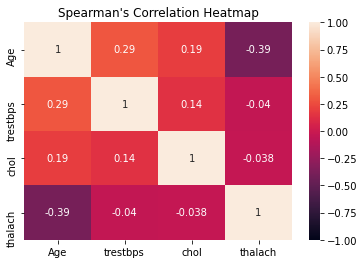

In [7]:
#Question 3
spearman_corr = df[['Age', 'trestbps','chol','thalach']].corr(method = "spearman")
spearman_heatmap = sns.heatmap(spearman_corr,vmin=-1, vmax=1,annot=True)
spearman_heatmap.set_title('Spearman\'s Correlation Heatmap')
plt.show()

Age is most correlated with resting blood pressure. Spearman's correlation coefficient: 0.29

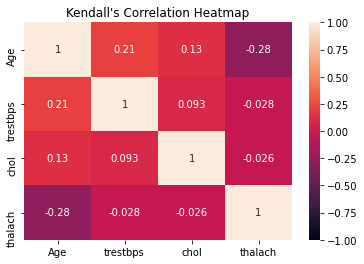

In [8]:
kendall_corr = df[['Age', 'trestbps','chol','thalach']].corr(method = "kendall")
kendall_heatmap = sns.heatmap(kendall_corr,vmin=-1, vmax=1,annot=True)
kendall_heatmap.set_title('Kendall\'s Correlation Heatmap')
plt.show()

Age is most correlated with resting blood pressure. Kendall's correlation coefficient: 0.21

**Question 4:**

Discrete: sex, cp, fbs, resetecg, exang, slope, thal, ca, num
Continuous: trestbps, chol, thalach

Age is considered a discrete variable if only the number of years is counted, or continuous if measured as a time variable.

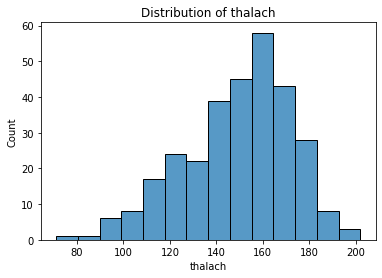

In [9]:
#Question 5
sns.histplot(df["thalach"])
plt.title("Distribution of thalach")
plt.show()

thalach is negative distribution (skewed left)

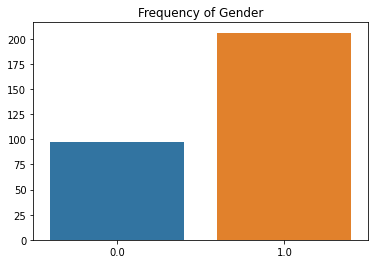

In [10]:
#Question 6
gender = df.Sex.value_counts()
sns.barplot(x=gender.index, y=gender.values)
plt.title("Frequency of Gender")
plt.show()

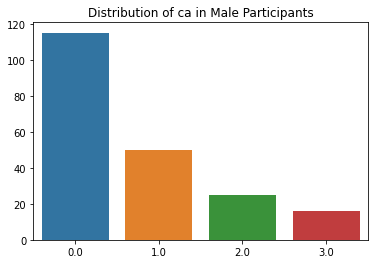

In [11]:
male_df = df.loc[df['Sex']==1]
ca = male_df.ca.value_counts()
sns.barplot(x=ca.index, y=ca.values)
plt.title("Distribution of ca in Male Participants")
plt.show()

In [12]:
#Question 7
from scipy.stats import iqr
def outliers(feature):
    """Calculates the outlier for different features.
    Args:
    feature: features for which the outliers needs to be computed.
    Returns:
    The indices of the outliers.
    """
    sns.boxplot(x=df[feature])
    plt.show()
    q1, q3= np.percentile(df[feature],[25,75])
    lower_bound = q1 -(1.5 * iqr(df[feature])) 
    upper_bound = q3 +(1.5 * iqr(df[feature])) 
    print(lower_bound, upper_bound)
    indices = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound))
    return indices

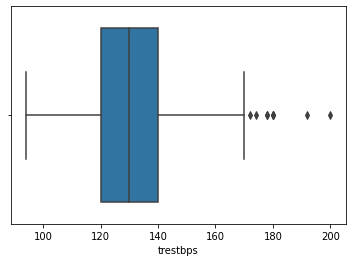

90.0 170.0


(array([ 14,  83, 126, 172, 183, 188, 201, 213, 231]),)

In [13]:
outliers('trestbps')

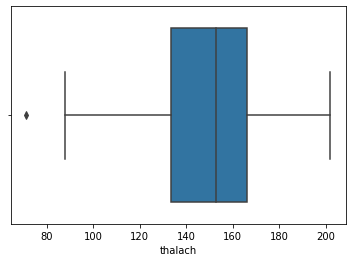

84.75 214.75


(array([245]),)

In [14]:
outliers('thalach')

## Exercise 3 - Hypothesis Testing (total: 5 points)

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
from itertools import combinations

### Are all the criteria for carrying out a t-test to identify a significant difference in the age of patients who have heart disease and those who don’t, met? (3 points)


#### If criteria is not met, point out the unmet conditions for the variables, and mention a possible solution in-order to combat this issue. 

* No, the age feature is not normally distributed. This can be tested for using either Shapiro-Wilk's test (as shown in the code cell below) or by plotting the distribution of the feature
* There are multiple solutions to combat this issue, namely:
  1. Using a non-parametric hypothesis test, such as Mann-Whitney U test
  0. A creative solution to the problem is to take the logarithm of the 2 groups (with heart disease, and without) and carry out the t-test on the log-transformed values

**Note - If you were to take the logarithm, you need to still make sure that the 2 groups have equal variances (take a look at Levene's test)** 

In [16]:
# Split the age feature into 2 groups
heart_disease = df[df['num'] == 1]['Age'].copy()
normal = df[df['num'] == 0]['Age'].copy()

# Shapiro-Wilks test
stat, pval = sp.stats.shapiro(heart_disease)
print(f"Shapiro test for patients with heart disease:\n\tStatistic: {stat} & P-Value: {pval}\n")

stat, pval = sp.stats.shapiro(normal)
print(f"Shapiro test for normal patients:\n\tStatistic: {stat} & P-Value: {pval}")

Shapiro test for patients with heart disease:
	Statistic: 0.9677355885505676 & P-Value: 0.002255889819934964

Shapiro test for normal patients:
	Statistic: 0.9870028495788574 & P-Value: 0.1320628970861435


The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. And as the p-value for the normal patients is not significant, a normal distribution cannot be assumed. Due to which we must carry out a different test or a data transformation step to account for it.

In order to account for the non-normality we will now take the logarithm of the age feature for the 2 groups.

In [17]:
# Levene's test to test equality of variance between the 2 groups
levene_result = sp.stats.levene(np.log(heart_disease), np.log(normal))
print(f"Levene's test:\n\tStatistic: {levene_result.statistic}, P-Value: {levene_result.pvalue}\n")

# T-Test
t_test = sp.stats.ttest_ind(np.log(heart_disease), np.log(normal), equal_var = True)   
print(f"T-Test of log transformed values:\n\t Statistic: {t_test.statistic}, P-Value: {t_test.pvalue}")

Levene's test:
	Statistic: 10.64895386190539, P-Value: 0.0012280952241828288

T-Test of log transformed values:
	 Statistic: 4.09425064523287, P-Value: 5.447049903915471e-05


### And using χ²−test, identify if there is a significant association between exercise induced angina (exang), and the slope of the peak exercise ST segment (slope)? (3 points)

Similar to Fisher's test, χ²−test is also a test on categorical variables. But χ²−test is only an approximation and not an "exact" test to identify the association between 2 variables.

In [20]:
# Generate a contingency table for slope and exercise induced angina
tab = pd.crosstab(df['exang'], df['slope'])

# Carry out Chi-Square test to identif the association
chi, pvalue, dof, expected = sp.stats.chi2_contingency(tab)
print(f"Chi square test:\n\tChi: {chi}\n\tPvalue: {pvalue}")

Chi square test:
	Chi: 25.131165603245137
	Pvalue: 3.490090811425977e-06


It can be see that there is definitely an association between the exercise induced angina and the slope of the peak exercise ST segment. 